<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.drop(columns = 'id', inplace = True)
df.drop(columns = 'date', inplace = True)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


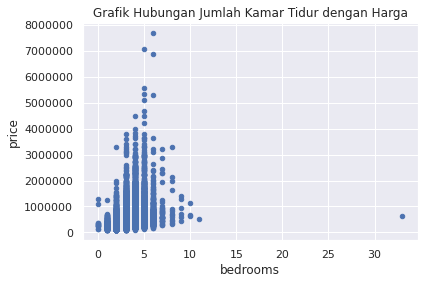

In [ ]:
sns.set()
df.plot(x='bedrooms',y='price', kind = 'scatter')
plt.title('Grafik Hubungan Jumlah Kamar Tidur dengan Harga')
plt.ticklabel_format(style='plain')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


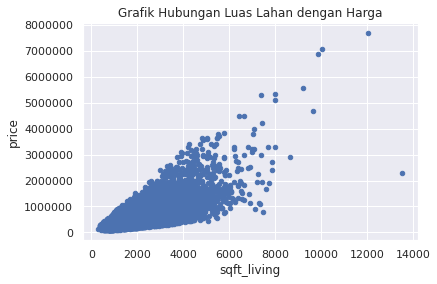

In [ ]:
sns.set()
df.plot(x='sqft_living',y='price', kind = 'scatter')
plt.title('Grafik Hubungan Luas Lahan dengan Harga')
plt.ticklabel_format(style='plain')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


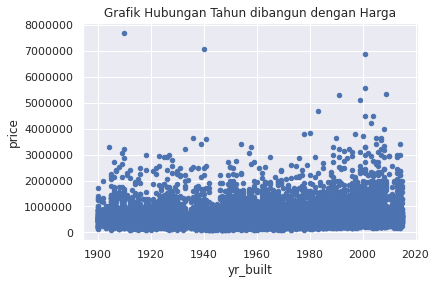

In [ ]:
sns.set()
df.plot(x='yr_built',y='price', kind = 'scatter')
plt.title('Grafik Hubungan Tahun dibangun dengan Harga')
plt.ticklabel_format(style='plain')
plt.show()

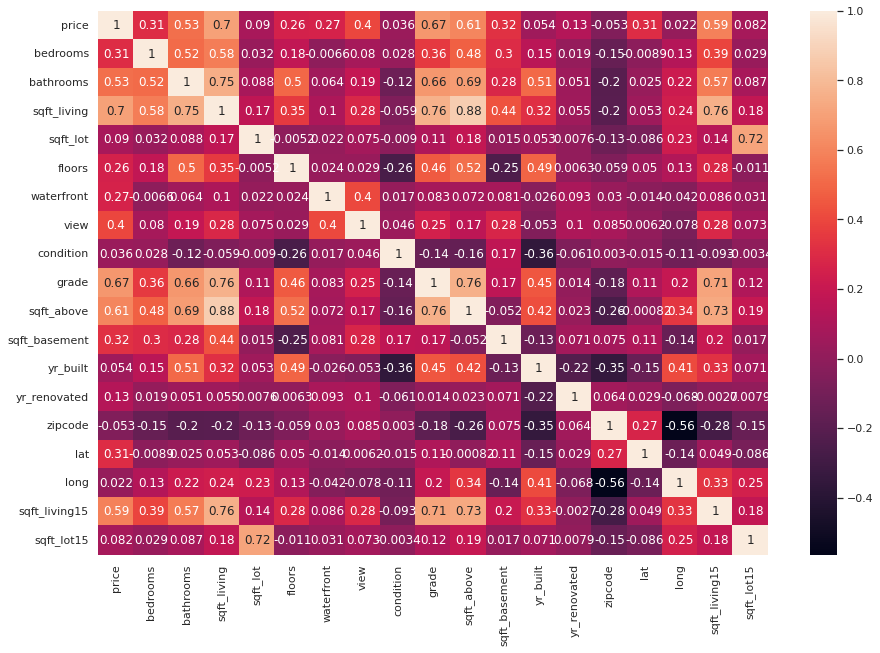

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [6]:
#Splitting Data

train, test = train_test_split(df, test_size=0.1, random_state=0)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 19451
No. of testing examples: 2162


In [7]:
#Mengambil X dan Y untuk Train
x_train=train.drop('price',axis=1)
y_train=train[['price']]

#Mengambil X dan Y untuk Test
x_test=test.drop('price',axis=1)
y_test=test[['price']]

#Shapes dari x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19451, 18), (19451, 1), (2162, 18), (2162, 1))

In [ ]:
x_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2763,3,2.5,1990,4040,1.5,0,0,5,8,1390,600,1926,0,98103,47.6867,-122.354,1180,3030
16481,3,1.5,880,6600,1.0,0,0,5,6,880,0,1945,0,98178,47.5002,-122.247,1020,6600


In [ ]:
y_train.head(2)

,price
2763,579000.0
16481,253000.0


# Regresi Linear

In [11]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [12]:
lr_score = lr.score(x_test, y_test)
lr_score

0.6947931813503969

In [13]:
lr_pred = lr.predict(x_test)
print(lr_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 377407.82036131 1535408.6166089   544068.18961677  578922.49397203
  974117.03554523]
[ 297000. 1578000.  562100.  631500.  780000.]


In [14]:
lr_mse = mean_squared_error(y_test.values, lr_pred)
lr_rmse = mean_squared_error(y_test.values, lr_pred,squared=False)
lr_mae = mean_absolute_error(y_test.values, lr_pred)
lr_r = r2_score(y_test.values, lr_pred)

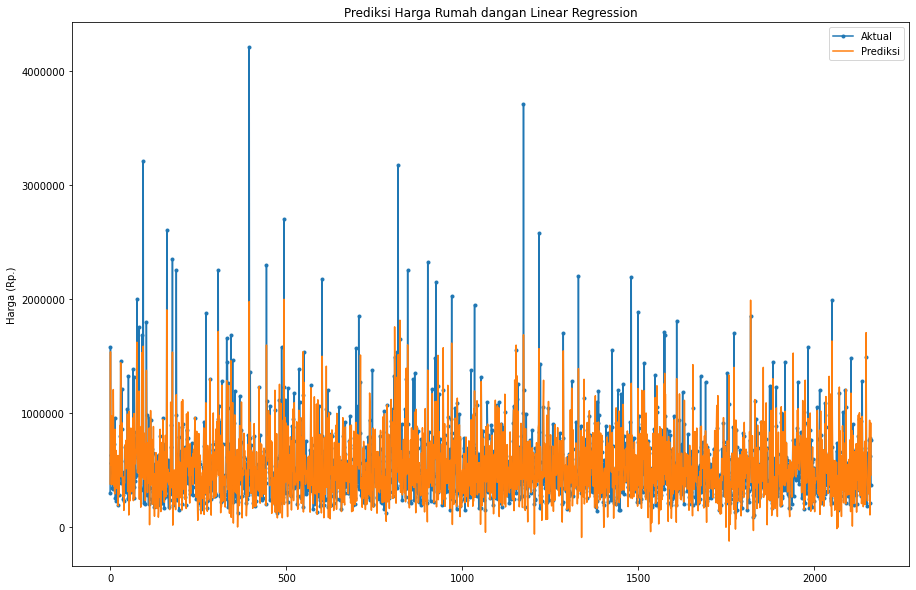

In [23]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), lr_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Linear Regression')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

In [18]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Linear Regression'] = lr_pred.flatten()
hasil_prediksi['Linear Regression'] = hasil_prediksi['Linear Regression'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression
0,297000.0,377408.0
1,1578000.0,1535409.0
2,562100.0,544068.0
3,631500.0,578922.0


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(max_depth=10, random_state=0)

In [20]:
model_score = rf.score(x_test, y_test)
model_score

0.8661669000767485

In [21]:
rf_pred = rf.predict(x_test)
print(rf_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 348323.03299007 1686188.38760536  530825.85699472  520630.21326401
  756554.59465889]
[ 297000. 1578000.  562100.  631500.  780000.]


In [26]:
rf_mse = mean_squared_error(y_test.values, rf_pred)
rf_rmse = mean_squared_error(y_test.values, rf_pred,squared=False)
rf_mae = mean_absolute_error(y_test.values, rf_pred)
rf_r = r2_score(y_test.values, rf_pred)

print('Nilai Mean Squared Error      = {}'.format(rf_mse))
print('Nilai Root Mean Squared Error = {}'.format(rf_rmse))
print('Nilai Mean Absolute Error     = {}'.format(rf_mae))
print('Nilai R2                      = {}'.format(rf_r))

Nilai Mean Squared Error      = 15575427944.721363
Nilai Root Mean Squared Error = 124801.55425603225
Nilai Mean Absolute Error     = 71670.95405641769
Nilai R2                      = 0.8661669000767485


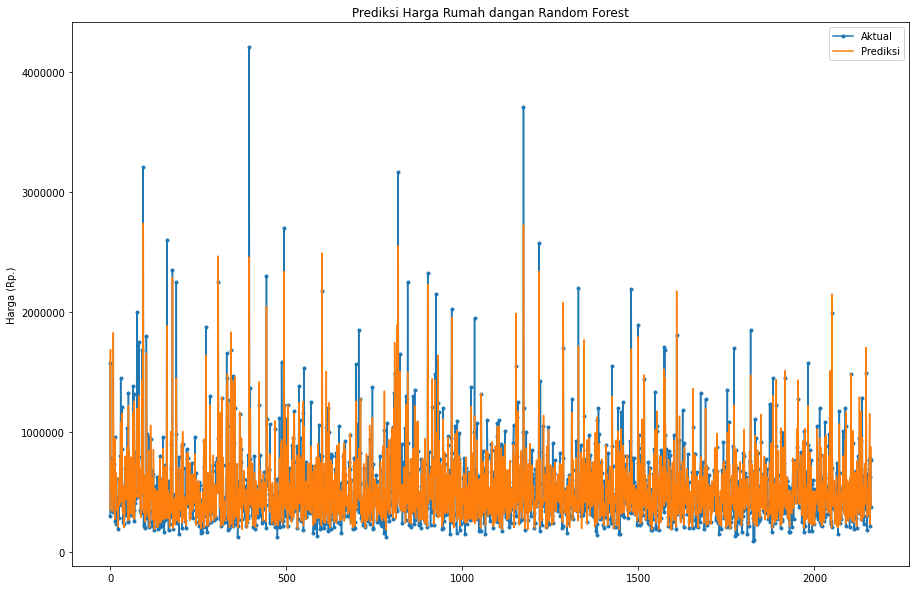

In [24]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), rf_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Random Forest')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

In [27]:
hasil_prediksi['RandomForest'] = rf_pred.flatten()
hasil_prediksi['RandomForest'] = hasil_prediksi['RandomForest'].round(0)
hasil_prediksi.head(4)

,Aktual,Random Forest,RandomForest
0,297000.0,348323.0,348323.0
1,1578000.0,1686188.0,1686188.0
2,562100.0,530826.0,530826.0
3,631500.0,520630.0,520630.0


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [30]:
dt_pred = dt.predict(x_test)

In [34]:
dt_score = dt.score(x_test, y_test)
print('Model accuracy Decision Tree : ' , dt_score)

Model accuracy Decision Tree :  0.758451615875944


In [35]:
dt_pred = dt.predict(x_test)
print(dt_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 303000. 1680000.  500000.  610000.  865000.]
[ 297000. 1578000.  562100.  631500.  780000.]


In [36]:
dt_mse = mean_squared_error(y_test.values, dt_pred)
dt_rmse = mean_squared_error(y_test.values, dt_pred,squared=False)
dt_mae = mean_absolute_error(y_test.values, dt_pred)
dt_r = r2_score(y_test.values, dt_pred)

print('Nilai Mean Squared Error      = {}'.format(dt_mse))
print('Nilai Root Mean Squared Error = {}'.format(dt_rmse))
print('Nilai Mean Absolute Error     = {}'.format(dt_mae))
print('Nilai R2                      = {}'.format(dt_r))

Nilai Mean Squared Error      = 28111277809.79151
Nilai Root Mean Squared Error = 167664.18165425648
Nilai Mean Absolute Error     = 90001.9789546716
Nilai R2                      = 0.758451615875944


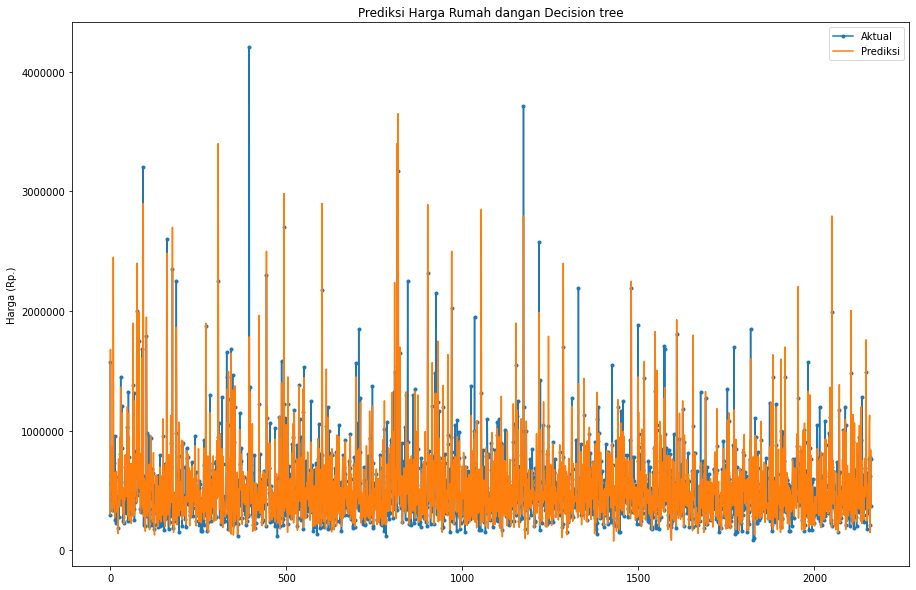

In [38]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), dt_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Decision tree')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

In [39]:
hasil_prediksi['Decisiontree'] = dt_pred.flatten()
hasil_prediksi['Decisiontree'] = hasil_prediksi['Decisiontree'].round(0)
hasil_prediksi.head(4)

,Aktual,Random Forest,RandomForest,Decisiontree
0,297000.0,348323.0,348323.0,303000.0
1,1578000.0,1686188.0,1686188.0,1680000.0
2,562100.0,530826.0,530826.0,500000.0
3,631500.0,520630.0,520630.0,610000.0


# Naive Bayes

In [40]:
# Import model gaussian
modelnb = GaussianNB()

In [41]:
nbtrain = modelnb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
# prediksi
nbpred = nbtrain.predict(x_test)

In [43]:
nb_score = dt.score(x_test, y_test)
print('Model accuracy Naive Bayes : ' , nb_score)

Model accuracy Naive Bayes :  0.758451615875944


In [44]:
nb_pred = dt.predict(x_test)
print(nb_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 303000. 1680000.  500000.  610000.  865000.]
[ 297000. 1578000.  562100.  631500.  780000.]


In [45]:
nb_mse = mean_squared_error(y_test.values, nb_pred)
nb_rmse = mean_squared_error(y_test.values, nb_pred,squared=False)
nb_mae = mean_absolute_error(y_test.values, nb_pred)
nb_r = r2_score(y_test.values, nb_pred)

print('Nilai Mean Squared Error      = {}'.format(nb_mse))
print('Nilai Root Mean Squared Error = {}'.format(nb_rmse))
print('Nilai Mean Absolute Error     = {}'.format(nb_mae))
print('Nilai R2                      = {}'.format(nb_r))

Nilai Mean Squared Error      = 28111277809.79151
Nilai Root Mean Squared Error = 167664.18165425648
Nilai Mean Absolute Error     = 90001.9789546716
Nilai R2                      = 0.758451615875944


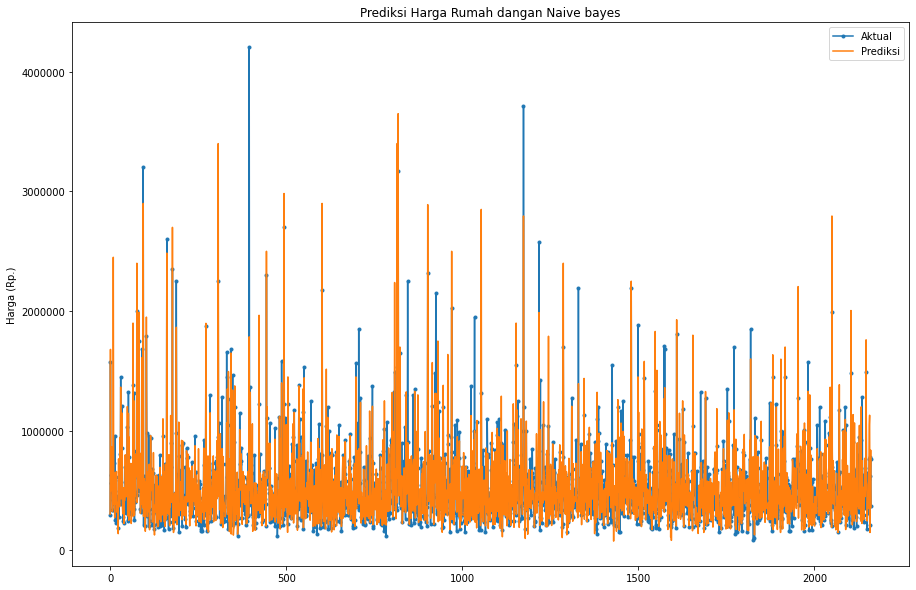

In [46]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), nb_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Naive bayes')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

In [47]:
hasil_prediksi['Naivebayes'] = dt_pred.flatten()
hasil_prediksi['Naivebayes'] = hasil_prediksi['Naivebayes'].round(0)
hasil_prediksi.head(4)

,Aktual,Random Forest,RandomForest,Decisiontree,Naivebayes
0,297000.0,348323.0,348323.0,303000.0,303000.0
1,1578000.0,1686188.0,1686188.0,1680000.0,1680000.0
2,562100.0,530826.0,530826.0,500000.0,500000.0
3,631500.0,520630.0,520630.0,610000.0,610000.0


In [49]:
# perbandingan akurasi
print('Model accuracy linear regression : ' , lr_score)
print('Model Accuracy random forest:', model_score)
print('Model accuracy Decision Tree : ' , dt_score)
print('Model accuracy Naive Bayes : ' , nb_score)

Model accuracy linear regression :  0.6947931813503969
Model Accuracy random forest: 0.8661669000767485
Model accuracy Decision Tree :  0.758451615875944
Model accuracy Naive Bayes :  0.758451615875944
